# Exploratory Data Analysis (EDA)

In [4]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)                     
sns.set(style="whitegrid")    

In [5]:
# 2. Load dataset
df = pd.read_csv('C:/Users/hh/Desktop/Target_Retail_Sales_Forecasting.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [6]:
# 3. Data inspection
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDescriptive statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 649
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 78.1+ KB
None

Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64



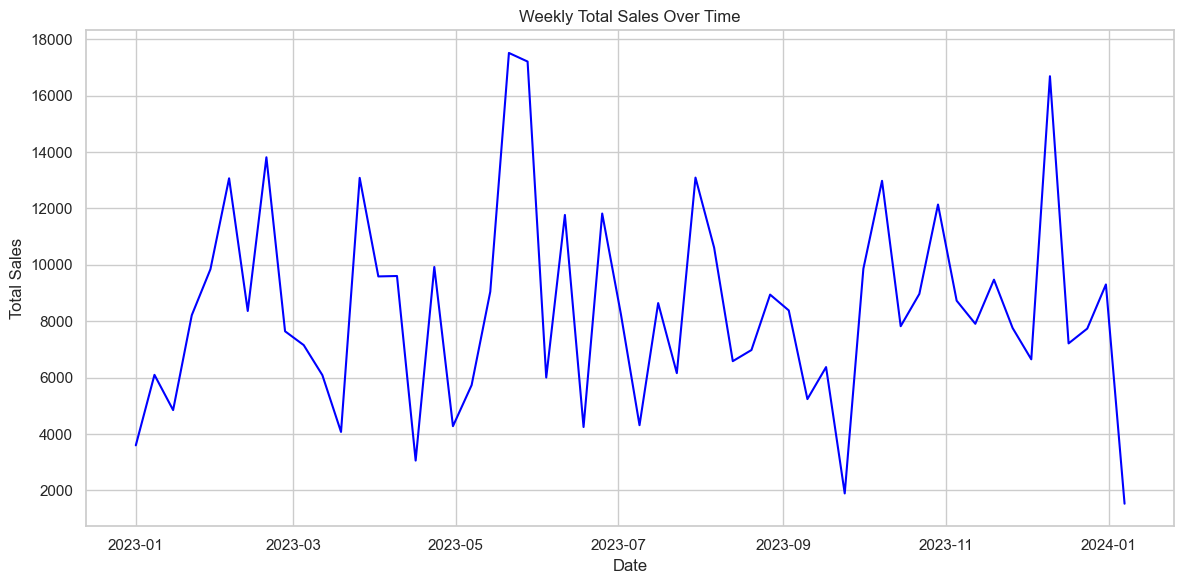

In [7]:
# 4. Aggregate to weekly sales
weekly_df = df.groupby(pd.Grouper(key='Date', freq='W'))['Total Amount'].sum().reset_index()
weekly_df.sort_values('Date', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Date'], weekly_df['Total Amount'], color='blue')
plt.title('Weekly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [8]:
# 5. Feature engineering
weekly_df['Year'] = weekly_df['Date'].dt.year
weekly_df['Month'] = weekly_df['Date'].dt.month
weekly_df['lag_1'] = weekly_df['Total Amount'].shift(1)
weekly_df['lag_2'] = weekly_df['Total Amount'].shift(2)
weekly_df['rolling_3'] = weekly_df['Total Amount'].rolling(window=3).mean()
weekly_df['rolling_std_3'] = weekly_df['Total Amount'].rolling(window=3).std()
weekly_df['is_holiday'] = weekly_df['Month'].isin([12, 1]).astype(int)

# Fill missing values
weekly_df['lag_1'] = weekly_df['lag_1'].bfill()
weekly_df['lag_2'] = weekly_df['lag_2'].bfill()
weekly_df['rolling_3'].fillna(weekly_df['Total Amount'].mean(), inplace=True)
weekly_df['rolling_std_3'].fillna(weekly_df['Total Amount'].std(), inplace=True)

# Confirm no missing values
weekly_df.isnull().sum()

C:\Users\hh\AppData\Local\Temp\ipykernel_8376\3525547938.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weekly_df['rolling_3'].fillna(weekly_df['Total Amount'].mean(), inplace=True)
C:\Users\hh\AppData\Local\Temp\ipykernel_8376\3525547938.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Date             0
Total Amount     0
Year             0
Month            0
lag_1            0
lag_2            0
rolling_3        0
rolling_std_3    0
is_holiday       0
dtype: int64

In [9]:
# 6. Stationarity test
from statsmodels.tsa.stattools import adfuller

result = adfuller(weekly_df['Total Amount'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("The time series is stationary." if result[1] < 0.05 else "The time series is not stationary.")


ADF Statistic: -6.7728
p-value: 0.0000
The time series is stationary.
